In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
np.random.seed(0)

In [3]:
def Data(pinit_val,qinit_val):
    def hamilton(t,r):
        p, q =r 
        #H = p**2 + q**2 # spring hamiltonian (linear oscillator)
        pdot= -2*q  
        qdot=2*p
        return pdot,qdot
    
    ll=1200
    sol=integrate.solve_ivp(hamilton,(0,240),(pinit_val,qinit_val),t_eval=np.linspace(0,240,ll))
    p = sol.y[0] + (np.random.uniform(0,0.6,ll))
    q = sol.y[1] + (np.random.uniform(0,0.6,ll))
    pdot,qdot = -2*q,2*p
    return np.array([p,q,pdot,qdot])

    

In [4]:
full_p,full_q,full_pdot,full_qdot=Data(1,1)

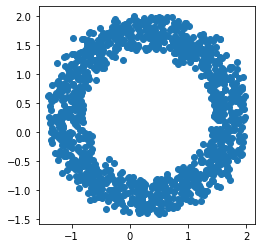

In [5]:
plt.plot(full_p,full_q,'o')
plt.axis('scaled');

In [6]:
train_p,fulltest_p=np.split(full_p,[800])
train_q,fulltest_q=np.split(full_q,[800])
train_pdot,fulltest_pdot=np.split(full_pdot,[800])
train_qdot,fulltest_qdot=np.split(full_qdot,[800])

In [7]:
test_p,new_p=np.split(fulltest_p,[200])
test_q,new_q=np.split(fulltest_q,[200])
test_pdot,new_pdot=np.split(fulltest_pdot,[200])
test_qdot,new_qdot=np.split(fulltest_qdot,[200])

In [8]:
new_pdot;

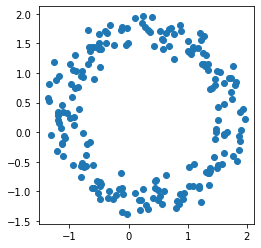

In [9]:
plt.plot(test_p,test_q,'o')
plt.axis('scaled');

In [10]:
train_list=np.array([[train_p,train_q],[train_pdot,train_qdot]])
test_list=np.array([[test_p,test_q],[test_pdot,test_qdot]])
new_list=np.array([[new_p,new_q],[new_pdot,new_qdot]])

In [11]:
# tfp= tf.constant(x)
# tfq= tf.constant(y)
# with tf.GradientTape() as g:
#     g.watch([tfp,tfq])
#     H= tfp**2+ tfq**2
#     dH_dp,dH_dq = g.gradient(H, [tfp,tfq])
#     print(dH_dp,'\n',dH_dq)

In [12]:
#def loss(ypred,ytruth):
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-12-7af0d38ef7ea>, line 3)

In [16]:
# def HNN():

In [31]:
myModel=keras.models.Sequential()
myModel.add(keras.layers.Flatten(input_shape=[2]))
myModel.add(keras.layers.Dense(50, activation="tanh"))
myModel.add(keras.layers.Dense(100, activation="tanh"))
myModel.add(keras.layers.Dense(2, activation="softmax"))

In [32]:
myModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_7 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 202       
Total params: 5,452
Trainable params: 5,452
Non-trainable params: 0
_________________________________________________________________


In [33]:
#tf.keras.losses.mean_absolute_error
# myModel.compile(loss="mean_squared_error",
#                 optimizer="Adam",
#                 metrics=["accuracy"])

In [34]:
myModel.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer="Adam",
                metrics=["accuracy"])

In [35]:
x_train=np.transpose(train_list[1])
y_train=np.transpose(train_list[0])

In [36]:
trainedModel=myModel.fit(x_train,y_train, epochs=3)
                        #,validation_data=(X_valid, y_valid))

Epoch 1/3
25/25 [==============================] - 0s 2ms/step - loss: 0.8541 - accuracy: 0.7812
Epoch 2/3
25/25 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.9950
Epoch 3/3
25/25 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 1.0000


<AxesSubplot:>

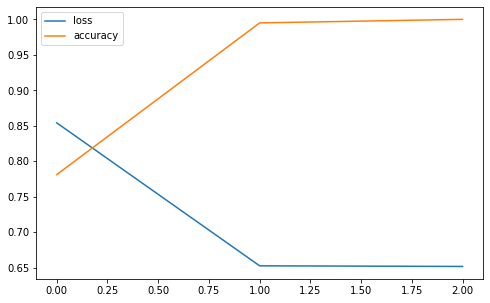

In [37]:
import pandas as pd
pd.DataFrame(trainedModel.history).plot(figsize=(8, 5))


In [38]:
x_test=np.transpose(test_list[1])
y_test=np.transpose(test_list[0])

In [39]:
myModel.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 1.0000


[0.6531785726547241, 1.0]

In [40]:
newx_test=np.transpose(test_list[1])
newy_test=np.transpose(test_list[0])

In [41]:
y_pred = myModel.predict(newx_test)

In [42]:
newp,newq=test_list[1]

In [43]:
pred_pdot,pred_qdot=np.transpose(y_pred)

In [44]:
a=newp+pred_pdot
b=newq+pred_qdot

No handles with labels found to put in legend.


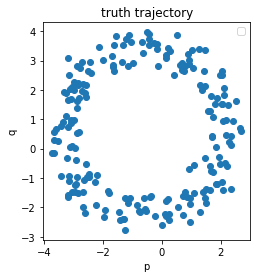

In [45]:
plt.plot(new_pdot,new_qdot,'o')
plt.axis('scaled')
plt.title('truth trajectory')
plt.xlabel('p')
plt.ylabel('q')
plt.legend();

No handles with labels found to put in legend.


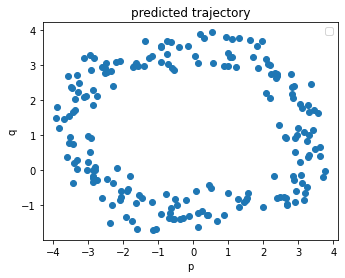

In [46]:
plt.plot(a,b,'o')
plt.title('predicted trajectory')
plt.xlabel('p')
plt.ylabel('q')
plt.axis('scaled');
plt.legend();